#**CheckPoint 02 - Disciplina: Deep Learning & IA**

---

##**Grupo Untitled Project**



### **Integrantes do Grupo**
*   **Nome:** Caio Chamone - **RM:** 84820
*   **Nome:** Caroline Evangelista - **RM:** 84409
*   **Nome:** Fernando Tumenas - **RM:** 85997
*   **Nome:** Tiago de Sousa - **RM:** 85323




#**FIAP - Tecnólogo de Banco de Dados**

---


#**0. Enunciado:** Pipeline de Machine Learning - Checkpoint 02

---



---



Faça o exercício abaixo <font color="red">em grupos de até 3 pessoas</font>, para praticar o uso do `sklearn` em Machine Learning. Utilize os conceitos vistos em aula, e consulte [documentações](https://scikit-learn.org/stable/) na internet. Em caso de dúvidas, contate o Prof. Michel. 

**Entrega**: 10/maio/2021, via [este link](https://forms.gle/ALy8nRSj16u6dS9YA) - IMPORTANTE: renomeie o notebook incluindo seu nome! 

**Link de entrega**: https://forms.gle/ALy8nRSj16u6dS9YA


## Apresentação do trabalho

Vamos trabalhar com uma base de dados que <font color="red">mapeia o **preço de smartphones** em 4 faixas possíveis de acordo com as características do aparelho</font>. A base original está no [Kaggle](https://www.kaggle.com/iabhishekofficial/mobile-price-classification). 


**O desafio**: O trabalho está dividido em 2 partes: 

1. <font color="red"> _Parte 1_ </font>: utilizando todos os atributos fornecidos (veja abaixo), exceto o `price_range`, faça uma clusterização dos dados descobrindo qual o número ideal de grupos. Compare sua resposta com os valores possíveis de `price_range`. 

    a. Sua análise levou a mais ou menos clusteres que o esperado? 
    
    b. Baseado nos valores das amostras pertencentes a cada um dos clusteres formados, o que eles significam? 
    
    
2. <font color="red"> _Parte 2_ </font>: utilizando o atributo `price_range` como label e os demais como features, construa um modelo de classificação de smartphones. Você não precisa utilizar todas as features. Faça a seleção que julgar pertinente e justifique suas escolhas. 

    a. Quais métricas você escolherá para avaliar o modelo? 
    
    b. Quais foram os resultados obtidos e o que eles significam? 

**Importante**: lembre-se dos passos do pipeline de machine learning para uso do sklearn! Precisamos ler a base, limpá-la, pensar em quais dados serão incorporados nos modelos, padronizar dados, etc. Nós revisamos no final da aula 8. Ao entrar no Kaggle para baixar os dados, atente-se: 
- utilize o arquivo `train.csv` para TREINAR e TESTAR seus modelos
- ignore o arquivo `test.csv`, pois ele não possui os labels


**Critérios de avaliação**: A correção do checkpoint será feita mediante os seguintes critérios:
- qualidade da compreensão e exploração da base
- qualidade/profundidade da limpeza dos dados 
- escolha de dados pertinentes para uso nos modelos 
- formas de padronizar os dados selecionados
- completute de atendimento ao pipeline de machine learning
- emprego correto dos conceitos vistos em sala de aula (uso do dataset, métricas, etc)
- análise/justificativas dos resultados


### A base de dados 

As variáveis são: 
- `id`: ID
- `battery_power`: Total energy a battery can store in one time measured in mAh
- `blue`: Has bluetooth or not
- `clock_speed`: speed at which microprocessor executes instructions
- `dual_sim`: Has dual sim support or not
- `fc`: Front Camera mega pixels
- `four_g`: Has 4G or not
- `int_memory`: Internal Memory in Gigabytes
- `m_dep`: Mobile Depth in cm
- `mobile_wt`: Weight of mobile phone
- `n_cores`: Number of cores of processor
- `pc`: Primary Camera mega pixels
- `px_height`: Pixel Resolution Height
- `px_width`: Pixel Resolution Width
- `ram`: Random Access Memory in Megabytes
- `sc_h`: Screen Height of mobile in cm
- `sc_w`: Screen Width of mobile in cm
- `talk_time`: longest time that a single battery charge will last when you are
- `three_g`: Has 3G or not
- `touch_screen`: Has touch screen or not
- `wifi`: Has wifi or not
- `price_range`: 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)


### Modelos a serem utilizados

Existem diversos modelos de aprendizado supervisionado para classificação e outros tantos para clusterização (não supervisionado). Aqui vamos focar nos dois modelos clássicos de _Machine Learning_ que já vimos:
- **KNN**: supervisionado, para _classificação_
- **K-means**: não-supervisionado, para _clusterização_

Abaixo temos os imports iniciais, mas você está livre para fazer outros imports pertinentes para seu código. Bom trabalho! 

#**1. Implementação**

---



---



##**1.1. Importações e Definições de Parâmetros**

In [70]:
import warnings
warnings.filterwarnings('ignore')

# Importando a biblioteca para leitura dos dados
import pandas as pd
import numpy as np

# Importando função para separar o dataset em TREINO e TESTE
from sklearn.model_selection import train_test_split 

# Importando as classes do sklearn para padronização dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Importando os construtores dos modelos 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# Importando as métricas a serem utilizadas
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Importando bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

###**Importando a base de dados**

Depois de importar a base de dados, fazemos uma breve analise observando se existem valores nulos, quais são os **tipos das variáveis (método df.info)** e entendendo quais são as **escalas de cada uma das variáveis (método df.mean())**.

In [71]:
df = pd.read_csv('train.csv')

In [72]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [73]:
df.info() ## não temos dados faltantes, todos os dados são do tipo numérico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [74]:
df.mean()  ## com as medias podemos ver que os números possuem escalas diferentes de valor

battery_power    1238.51850
blue                0.49500
clock_speed         1.52225
dual_sim            0.50950
fc                  4.30950
four_g              0.52150
int_memory         32.04650
m_dep               0.50175
mobile_wt         140.24900
n_cores             4.52050
pc                  9.91650
px_height         645.10800
px_width         1251.51550
ram              2124.21300
sc_h               12.30650
sc_w                5.76700
talk_time          11.01100
three_g             0.76150
touch_screen        0.50300
wifi                0.50700
price_range         1.50000
dtype: float64

In [75]:
df.describe() ## avaliando os valores do dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [76]:
df_sem_label = df.drop(['price_range'], axis=1) ## separando o price_range do restante do dataset

df_sem_label

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [77]:
sc = StandardScaler() ## chamando a função StanderdScaler para fazer a padronização dos dados numéricos

In [78]:
sc.fit(df_sem_label) ## treinando o modelo a partir dos dados sem o label de price_range

StandardScaler(copy=True, with_mean=True, with_std=True)

In [79]:
sc.mean_  ## observando o que foi aprendido a partir do treino

array([1.2385185e+03, 4.9500000e-01, 1.5222500e+00, 5.0950000e-01,
       4.3095000e+00, 5.2150000e-01, 3.2046500e+01, 5.0175000e-01,
       1.4024900e+02, 4.5205000e+00, 9.9165000e+00, 6.4510800e+02,
       1.2515155e+03, 2.1242130e+03, 1.2306500e+01, 5.7670000e+00,
       1.1011000e+01, 7.6150000e-01, 5.0300000e-01, 5.0700000e-01])

In [80]:
sc.var_  ## observando o que foi aprendido a partir do treino

array([1.92991816e+05, 2.49975000e-01, 6.65529938e-01, 2.49909750e-01,
       1.88387097e+01, 2.49537750e-01, 3.29102338e+02, 8.31419375e-02,
       1.25250900e+03, 5.23157975e+00, 3.67575278e+01, 1.96842937e+05,
       1.86702964e+05, 1.17605528e+06, 1.77425577e+01, 1.89687110e+01,
       2.98398790e+01, 1.81617750e-01, 2.49991000e-01, 2.49951000e-01])

In [81]:
df_norm = sc.transform(df_sem_label) ## normalizando os valores das variveis do dataset a partir do uso do metodo StanderdScaler

In [82]:
df_norm ## analisando os valores normalizados

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

### **Analisando a melhor quantidade de clusters usando a técnica WSCC**

Falando de maneira matemática, quando usamos o **WSCC (do inglês *within-clusters sum-of-squares*)** estamos em busca de uma quantidade de agrupamentos no qual a **soma dos quadrados intra-clusters** seja a menor.

Tratando-se do **KMeans** da biblioteca **scikit_learn** o cálculo do WSCC é processado e após isso ele retorna o nome de *inertia*.

In [83]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, max_iter=300) ## chamando a função do kmeans e atribuindo o numero de clusters com o numero maximo de 300 iterações
    kmeans.fit(df_norm) ## aplicando o K-means na base de dados
    wcss.append(kmeans.inertia_)

#**2. Soluções - Parte 01:**


---



---



##**2.1. K-Means: Cluesterização com Análise não Supervisionada** 




###<font color="Blue"> _**Resposta**_ </font> da pergunta **1-A:** 

Temos o melhor número de clusters quando o número de wcss e o de clusters cai drasticamente.

No caso do gráfico abaixo o **nosso número ideal de clusters seria 3**.

---

####**a. Sua análise levou a mais ou menos clusteres que o esperado?**

Na minha analise o número ideal de clusters seria 3, contudo, analisando o df original o numero correto de clusters seria 4, conforme a analise abaixo.

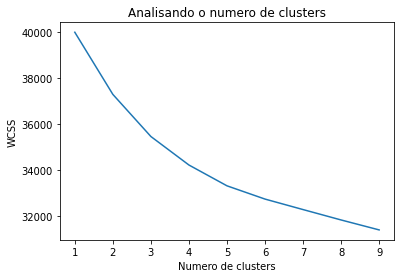

In [84]:
plt.plot(range(1,10), wcss)
plt.title("Analisando o numero de clusters")
plt.xlabel("Numero de clusters")
plt.ylabel("WCSS")
plt.show()


## o numero de clusters em que temos o melhor wcss e 3

###**Comparando com a quantidade ideal de clusters no df original que seriam 4**

In [85]:
df['price_range'].drop_duplicates() ## quantidade original de modelos foram 4

0    1
1    2
6    3
7    0
Name: price_range, dtype: int64

###**Agregando o numero de clusters criados ao DF original**

In [86]:
clusterizacao = KMeans(n_clusters = 3,  max_iter=300) ## criando o modelo
clusterizacao.fit(df_norm) # fazendo a aplicação do modelo na base de dados

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [87]:
df['KMeans_Clusters'] = clusterizacao.labels_ ## atribuindo os clusters ao objeto original
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,KMeans_Clusters
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,0


###<font color="Blue"> _**Resposta**_ </font> da pergunta **1-B:** 

###**b. Baseado nos valores das amostras pertencentes a cada um dos clusteres formados, o que eles significam?**

Como usamos a **técnica de PCA**, todas as variáveis foram resumidas em dois componentes, sendo que cada um desses dois componentes possuem os valores principais de cada cluster **(1,2,3)**.

Nestes dois componentes nós temos os valores que serão usados para plotar cada ponto no cluster ao qual ele pertence.

####**Visualizando todos os clusters de maneira grafica**

Para isso vamos usar a **análise de componentes principais (PCA)**.

A análise de componentes principais consiste em técnica que transforma um determinado grupo de variáveis originais em outro grupo com a mesma dimensão que chamamos de componentes principais.

In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) ## como usaremos um grafico com duas dimensões (x, y) usamos então um modelo que tenha dois componentes principais
pca_df = pca.fit_transform(df_norm) ## para conseguir os dois componentes principais usamos a função fit_transform com o dataset normalizado
pca_df_principal = pd.DataFrame(data = pca_df, columns = ['Primeiro_componente', 'Segundo_componente']) ## com o recurso do Pandas chamado DataFrame, faço o uso para transformar os componentes principais em um dataframe e renomeio as colunas
pca_labels_celulares = pd.concat([pca_df_principal, df[['KMeans_Clusters']]], axis=1) ## depois com a função Concat, concateno as colunas com os clusters criados chamada de "KMeans_Clusters"

pca_labels_celulares

,Primeiro_componente,Segundo_componente,KMeans_Clusters
0,0.319371,-2.327783,1
1,-1.929379,0.399020,2
2,-1.227302,0.144145,2
3,-1.077317,-0.143159,2
4,1.590659,1.198810,0
...,...,...,...
1995,-0.926362,0.550186,2
1996,-1.544967,-1.089040,2
1997,-1.131517,-0.094774,2
1998,-1.367516,0.763502,2


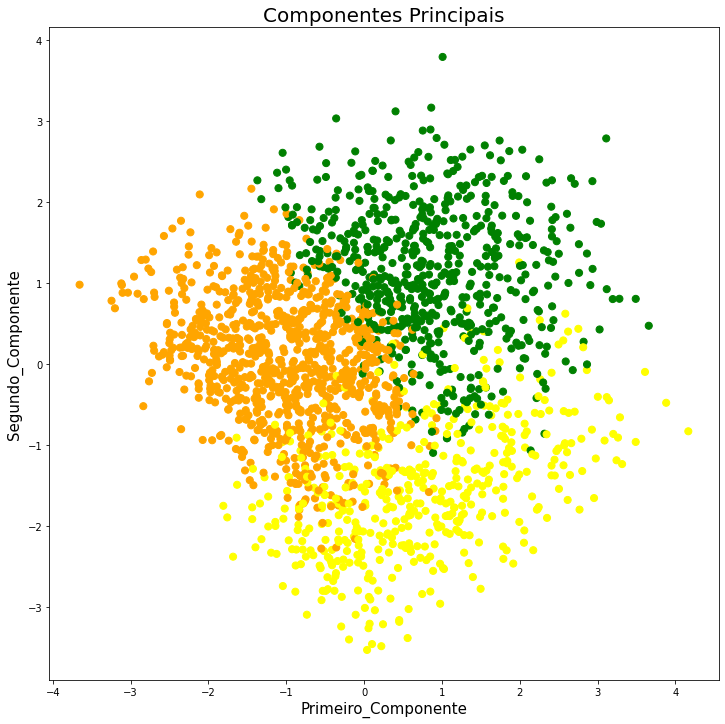

In [89]:
fig = plt.figure(figsize = (12,12))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Primeiro_Componente', fontsize=15)
ax.set_ylabel('Segundo_Componente', fontsize=15)
ax.set_title('Componentes Principais', fontsize=20)

color_theme = np.array(["green", "yellow", "orange"])
ax.scatter(x = pca_labels_celulares.Primeiro_componente, y=pca_labels_celulares.Segundo_componente, 
           c=color_theme[pca_labels_celulares.KMeans_Clusters], s=50)

plt.show()

#**3. Soluções - Parte 02:**


---



---

##**3.1. KNN: Classificação - Análise Supervisionada** 

In [90]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,KMeans_Clusters
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,2
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,2
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,2


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   battery_power    2000 non-null   int64  
 1   blue             2000 non-null   int64  
 2   clock_speed      2000 non-null   float64
 3   dual_sim         2000 non-null   int64  
 4   fc               2000 non-null   int64  
 5   four_g           2000 non-null   int64  
 6   int_memory       2000 non-null   int64  
 7   m_dep            2000 non-null   float64
 8   mobile_wt        2000 non-null   int64  
 9   n_cores          2000 non-null   int64  
 10  pc               2000 non-null   int64  
 11  px_height        2000 non-null   int64  
 12  px_width         2000 non-null   int64  
 13  ram              2000 non-null   int64  
 14  sc_h             2000 non-null   int64  
 15  sc_w             2000 non-null   int64  
 16  talk_time        2000 non-null   int64  
 17  three_g       

In [92]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,KMeans_Clusters
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,2
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,2
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,2


##**3.2. Questão 2.a. Quais serão as métricas utilizadas?**

---


A métrica a ser adotada será a acurácia de classificação.

Temos também já predefinido como Label a variável **Intervelo de Preço (price_range)** e  como demais variáveis a compor esta classificação optamos pela escolha de atributos físicos (Hardware) e Tecnológicos que compõem os aparelhos mais modernos, sendo elas: **Capacidade de Bateria (battery_power), bluetooth (blue), Sensibilidade ao toque (touch_screen), Conexão de rede (wifi), Memória Interna (int_memory), Dupla entrada de Chip (dual_sim), Largura de Pixels (px_width), Altura de Pixels (px_height).**



In [93]:
df1 = df[["price_range", "battery_power", "blue", "touch_screen", "wifi", "int_memory", "dual_sim", "px_width", "px_height"]] #Cria outro DF apenas com as variáveis escolhidas
df1

,price_range,battery_power,blue,touch_screen,wifi,int_memory,dual_sim,px_width,px_height
0,1,842,0,0,1,7,0,756,20
1,2,1021,1,1,0,53,1,1988,905
2,2,563,1,1,0,41,1,1716,1263
3,2,615,1,0,0,10,0,1786,1216
4,1,1821,1,1,0,44,0,1212,1208
...,...,...,...,...,...,...,...,...,...
1995,0,794,1,1,0,2,1,1890,1222
1996,2,1965,1,1,1,39,1,1965,915
1997,3,1911,0,1,0,36,1,1632,868
1998,0,1512,0,1,1,46,0,670,336


In [94]:
# Para fazerem divisão de TREINO, TESTE usando 70/30 e semente aleatória = 42
X = df.drop(columns=["battery_power", "blue", "touch_screen", "wifi", "int_memory", "dual_sim", "px_width", "px_height"])
y = df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)

Como a dataframe é composto **apenas por valores numéricos** não será necessário o uso do **OneHotEncoder**

In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

##**3.3. Análise da Acurácia da Classificação**
A princípio realizei um teste afim de encontrar o melhor número de vizinhos, através do experimento abaixo, que irá demostrar um gráfico de linha:

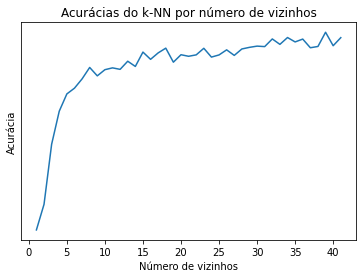

In [96]:
mean_scores = [] #Lista que recebe a acurácia média de obtida para cada K
for k in range(1,42): #Intervalo de variação de K vizinhos
    scores = []
    for i in range(60):
        X_train, X_test, y_train, y_test = train_test_split(X,y)
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train,y_train)
        accuracy = model.score(X_test,y_test)
        scores.append(accuracy)
    mean_scores.append(np.mean(scores))

#Gráfico de linha
plt.plot(np.arange(1,42),mean_scores)
plt.yticks([])
plt.title("Acurácias do k-NN por número de vizinhos")
plt.xlabel("Número de vizinhos")
plt.ylabel("Acurácia")
plt.show()

Neste código estabeleci uma **lista []** onde serão salvas as acurácias. Determinei o número de **k vizinhos de 1 à 42** e determinei que isto seja **repetido 60 vezes**, rodando o treinamento e a validação.

Observei que a partir de **15 vizinhos** o nível de acurácia não apresenta grandes alterações, apesar de sim aumentar. O KNN pode demonstrar modelos diferentes a cada execução e sendo a acurácia uma variável aleatória de acordo com uma probabilidade, decidi **manter o valor de 15 vizinhos**. Porém considerando esta situação para ser estudada futuramente e entender o porque isto ocorre.

